In [16]:
# import TensorFlow 
import tensorflow as tf

# Other libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2.10.1


In [17]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

The Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories.

In [18]:
df = tf.keras.datasets.fashion_mnist

# Adding training data and test data
(train_images, train_labels), (test_images, test_labels) = df.load_data()

In [19]:
train_images.shape

(60000, 28, 28)

In [20]:
len(train_labels)

60000

In [21]:
train_labels # has values from 0-9

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [22]:
test_images.shape

(10000, 28, 28)

In [23]:
len(test_labels)

10000

In [24]:
test_labels # has values from 1-9

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

1. Preprocessing Data

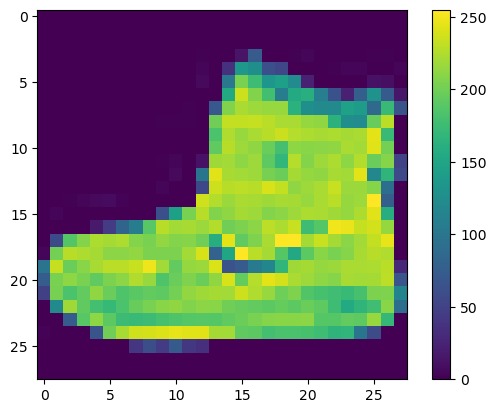

In [25]:
plt.figure()
# plt.figure(figsize=(10,8)) can also be used.
# The purpose of using plt.figure() is to create a figure object.
# The whole figure is regarded as the figure object. 
# It is necessary to explicitly use plt.figure() 
# when we want to tweak the size of the figure and 
# when we want to add multiple Axes objects in a single figure.
plt.imshow(train_images[0]) # To show data as an image
plt.colorbar() # adds a colorbar to a plot indicating the color scale.
plt.grid(False) # Add Grid Lines to a Plot
plt.show() 

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [26]:
train_images = train_images / 255.0
test_images = test_images / 255.0

<function matplotlib.pyplot.show(close=None, block=None)>

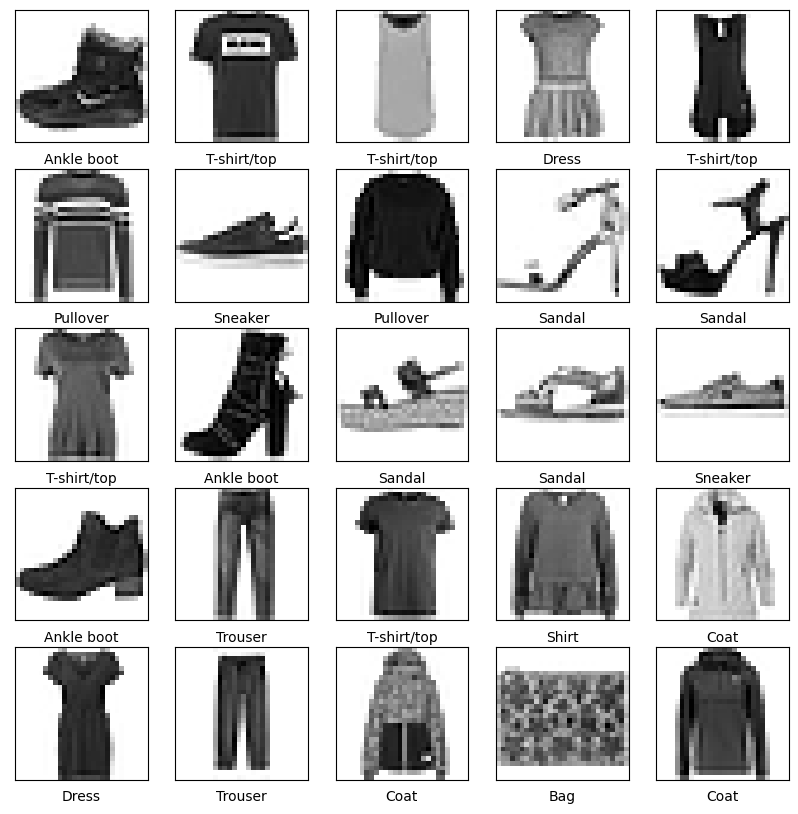

In [27]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show

2. Building Model

Building the neural network requires configuring the layers of the model, then compiling the model.

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), 
    # Transforms the format of images from 2d array (of 28 by 28 pixels) to 1d array(of 28 * 28 = 784 pixels).
    tf.keras.layers.Dense(128, activation='relu'), #  got 128 nodes
    #  These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons).
    tf.keras.layers.Dense(10)
    # The last layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.
])

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

3. Compiling Model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.

Optimizer —This is how the model is updated based on the data it sees and its loss function.

Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [29]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

4. Training Model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
2. The model learns to associate images and labels.
You ask the model to make predictions about a test set—in this example, the test_images array.
3. Verify that the predictions match the labels from the test_labels array.

Feeding  the model
To start training, call the model.fit method—so called because it "fits" the model to the training data:

In [30]:
model.fit(train_images, train_labels, epochs=10)
# A number of epochs means how many times you go through your training set.

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4996 - accuracy: 0.8263
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3751 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3352 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3102 - accuracy: 0.8871
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2958 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2801 - accuracy: 0.8975
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2691 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2577 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2494 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.240

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.90 (or 90%) on the training data.

5. Evaluating accuracy

In [36]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose =2)

print('\n Test Accuracy: ', test_accuracy*100)
print('\n Test loss: ', test_loss*100)

# Verbose=0 (silent)
# Verbose=1 (progress bar)
# Verbose=2 (one line per epoch)
# https://stackoverflow.com/questions/47902295/what-is-the-use-of-verbose-in-keras-while-validating-the-model

313/313 - 0s - loss: 0.3475 - accuracy: 0.8783 - 486ms/epoch - 2ms/step

 Test Accuracy:  87.83000111579895

 Test loss:  34.75484251976013


1. Training data accuracy : 90%

2. Test data accuracy : 87%


6. Making Predictions

With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.



In [38]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [41]:
predictions = probability_model(test_images)

In [42]:
predictions[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([3.97010709e-08, 1.11284635e-07, 3.21559801e-09, 1.71892278e-08,
       2.70747478e-07, 1.54195204e-02, 3.54161017e-07, 1.05173811e-01,
       4.45070009e-06, 8.79401445e-01], dtype=float32)>

In [44]:
np.argmax(predictions[0])
# numpy.argmax() function returns indices of the max element of the array in a particular axis. 

9

In [45]:
class_names[9]

'Ankle boot'

the model is most confident that this image is an ankle boot, or class_names[9]. Examining the test label shows that this classification is correct:


In [47]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

In [48]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

7. Verify predictions

Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

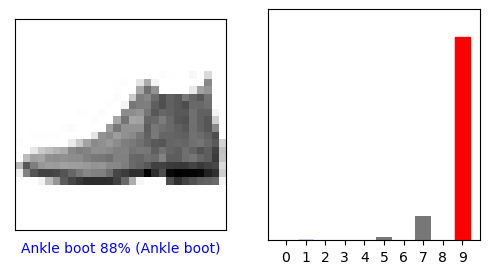

In [54]:
a = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
# The subplot() function takes three arguments that describes the layout of the figure.
# The layout is organized in rows and columns, which are represented by the first and second argument.
# The third argument represents the index of the current plot.
plot_image(a, predictions[a], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[a], test_labels)
plt.show()

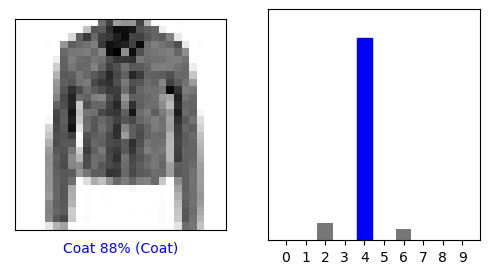

In [57]:
a = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(a, predictions[a], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(a, predictions[a], test_labels)
plt.show()

In [58]:
class_names[4]

'Coat'

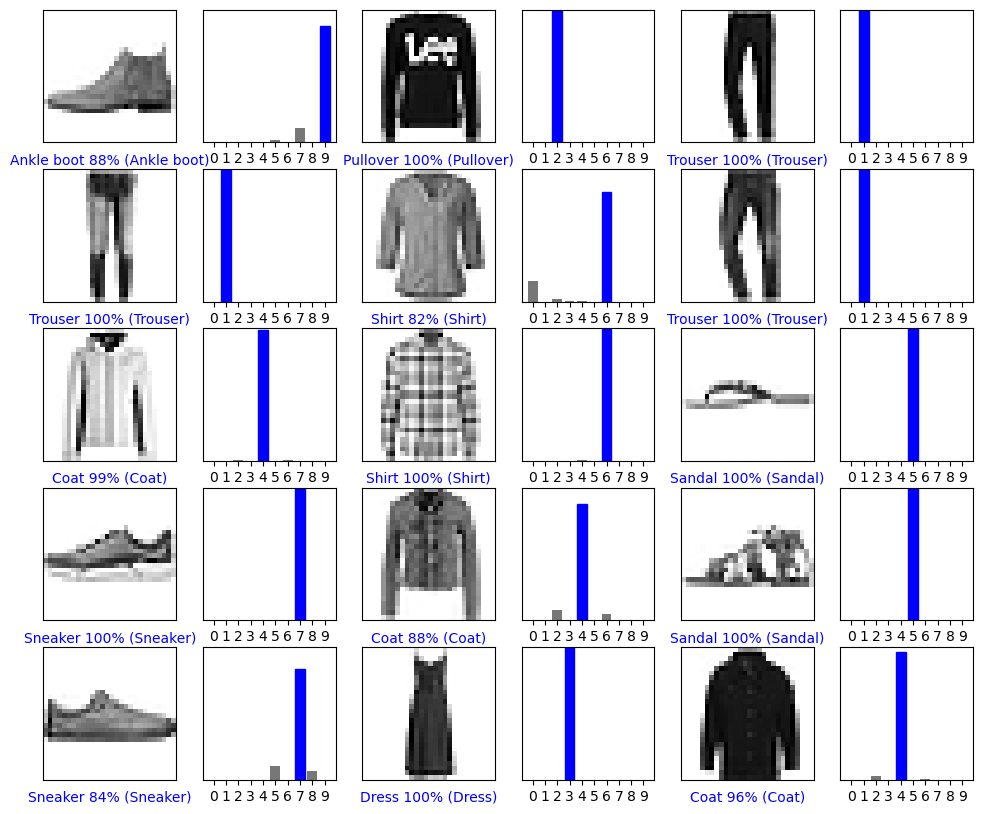

In [64]:
# # Plot the first X test images, their predicted labels, and the true labels.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i , predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout 
# https://stackoverflow.com/questions/9603230/how-to-use-matplotlib-tight-layout-with-figure
plt.show()

8. Using the trained model

Finally, using the trained model to make a prediction about a single image.

In [104]:
# Grab an image from the test dataset.

img = test_images[10]
print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. 
Accordingly, even though you're using a single image, you need to add it to a list:

In [105]:
# adding image to a batch, where its the only number
img = (np.expand_dims(img, 0))
# expand the shape of an array. 
# Insert a new axis that will appear at the axis position in 
# the expanded array shape.
print(img.shape)

# https://www.w3resource.com/numpy/manipulation/expand-dims.php

(1, 28, 28)


In [106]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 40ms/step
[[1.7329019e-05 4.6623725e-05 7.4352890e-02 9.9922284e-09 8.7770355e-01
  4.3587441e-08 4.7873825e-02 3.4622956e-06 1.9235679e-07 2.0286232e-06]]


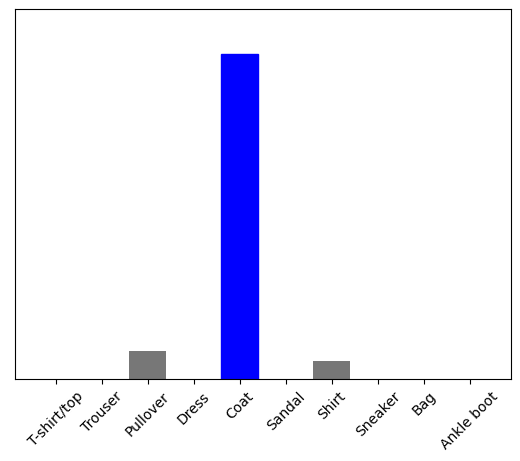

In [107]:
plot_value_array(10, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation =45)
plt.show()

In [108]:
np.argmax(predictions_single[0])

4

In [110]:
class_names[4]

'Coat'